<a id = 'title' ></a>

# Prediciting Customer Churn Within SyriaTel

name: Darryn Johnson

date: 07/30/24 

instructor: Mark Barbour

blog:

student pace: Flex

---

### Sources and Links:

original telecom data set: [SyriaTel](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset)

webiste used to create [maps](https://www.mapchart.net/usa.html)

webiste used for CRISP-DM visual: [IBM](https://www.ibm.com/docs/en/spss-modeler/saas?topic=dm-crisp-help-overview)

<a id = 'over' ></a>

---
# Overview

- [Title](#title)


- Sources and links


- Overview
    - a breakdown on sections in the notebook along with links


- [Business Understanding](#business) 
    - a breakdown of what this notebook is attempting to solve


- [Data Understanding](#data) 
    - a quick glance at the data we are working with
        - Dataset Metadata
            - a breakdown of what the columns describe in this dataframe


- [Methodoligy](#method)
    - an explination of the overall workflow used


- [Data Preparation](#prep)
    - cleaning / formating
        - cleaning and formating the data to assist with data understanding and modeling
    - data manipulation
        - function creation
            - creating personalized functions to speed up data gathering


- [Exploratory Data Analysis](#explore)
    - categorical data
        - state categorical
            - gather some data about the stae column
        - area code categorical
            - gather some information about the area code column
        - international plan categorical
            - gather some information about the internation plan column
        - voicemail plan categorical
            - gather some information about the voicemail plan column
    - [numerical data](#number)
        - grouped graphs and breakdown of numerical data


- [Model Preparation](#mprep)
    - one-hot encoding
        - turning true/false values into 0 and 1 values
    - scaling 
        - scaling numerical data under 1
    - train-test split
        - spliting the data into train and test sets


- [Model Building and Analysis](#mba)
    - model #1
        - logistic regression
            - model test
            - smote
            - [feature selection](#feature)
                - variance threshold
                - selectkbest
                    - f_regression
                    - mutual_info_regression
                - rfe
                - rfecv
                - lassocv
    - [model #2](#m2)
        - decision tree classifier
            - limiting each metric
                - max depth
                - minimum sample split
                - minimum sample leafs
                - maximum features
    - [model #2 v2](#mv2)


- [Conclusion](#con)


- [index](#index)

<a id = 'business' ></a>

---
# Business Understanding 

SyriaTel wishes to have a deeper understanding behined the reasons customers end their survices (churn). Within this notebook, we will look into several points of data including customer location, what perks a customer has, and most importantly, if a customer churned. We will use this data in predictive analysis in attempt to come to a conclusion on what causes a customer to churn.  

<a id = 'data' ></a>

---
# Data Understanding 

Here we will import necessary libaries to assist with data manipulation and gathering, as well do some surfice level data exploration so gain an understanding of what we are working with.  



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import (precision_score, recall_score, 
                             accuracy_score, f1_score)
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import (VarianceThreshold, SelectKBest, f_regression, 
                                       mutual_info_regression, RFE, RFECV)
from sklearn.linear_model import LassoCV

In [2]:
df = pd.read_csv('telecom_data.zip')

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Lets remove phone number as this specific data point doesn't pretain to the issue at hand. 

In [4]:
df.drop(columns = ['phone number'], axis = 1, inplace = True)

---
## Dataset Metadata

- state: The state of the customer.
- account length: The length of the account in days.
- area code: The area code of the customer's phone number.
- phone number: The phone number of the customer.
- international plan: Whether the customer has an international plan or not.
- voice mail plan: Whether the customer has a voicemail plan or not.
- number vmail messages: The number of voicemail messages the customer has.
- total day minutes: Total minutes of day calls.
- total day calls: Total number of day calls.
- total day charge: Total charge for the day calls.
- total eve minutes: Total minutes of evening calls.
- total eve calls: Total number of evening calls.
- total eve charge: Total charge for the evening calls.
- total night minutes: Total minutes of night calls.
- total night calls: Total number of night calls.
- total night charge: Total charge for the night calls.
- total intl minutes: Total minutes of international calls.
- total intl calls: Total number of international calls.
- total intl charge: Total charge for the international calls.
- customer service calls: Number of times the customer called customer service.
- churn: Whether the customer churned or not (True/False).
    - churn (True): customer has canceled their business with the company

Let's take a quick glance at how many customers are churning 

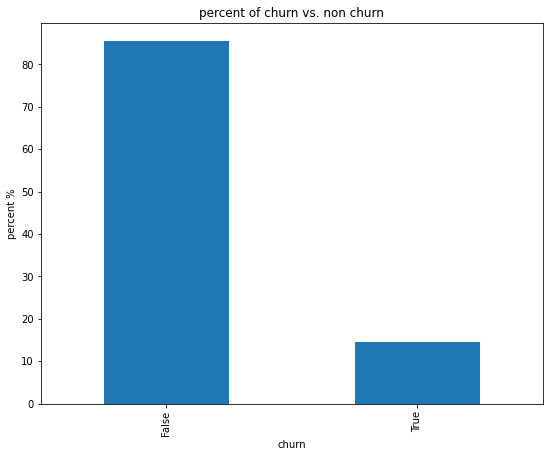

In [5]:
fig, ax = plt.subplots(figsize = (9,7))
churn_bar = df['churn'].value_counts(normalize=True) * 100
churn_bar.plot(kind='bar')
ax.set_ylabel('percent %')
ax.set_title('percent of churn vs. non churn')
plt.show();

In [6]:
round(len(df[df['churn'] == False]) / len(df) * 100, 2)

85.51

Above we can see that approximately 85.5 % of customers dont churn, meaning only about 14.48 % do. While this is a decently low rate, we can attempt to reduce this as little as possible to maximize revenue and customer retention.

Let's look into the data we have and determine which ones are categorical and which ones are continuous.
Categorical data is any data pretaining to a category, e.g. true/false or red/blue. Categorical is always one thing or another.
Whereas continuous data is data that can be infinate in scope e.g. 1.5, 16.3333333 and so on. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

- categorical data:
    - state
    - area code
    - international plan
    - voicemail plan
- continuous / numeric data:
    - everything else

<a id = 'method' ></a>

---
# Methodology

A common methodology used when attempting to create a model is CRISP-DM, which stands for:
- `CR`oss 
- `I`ndustry 
- `S`tandard 
- `P`rocess 
- (for) 
- `D`ata 
- `M`ining

A good visual for how this works is a model designed by [IBM](https://www.ibm.com/docs/en/spss-modeler/saas?topic=dm-crisp-help-overview)

<div>
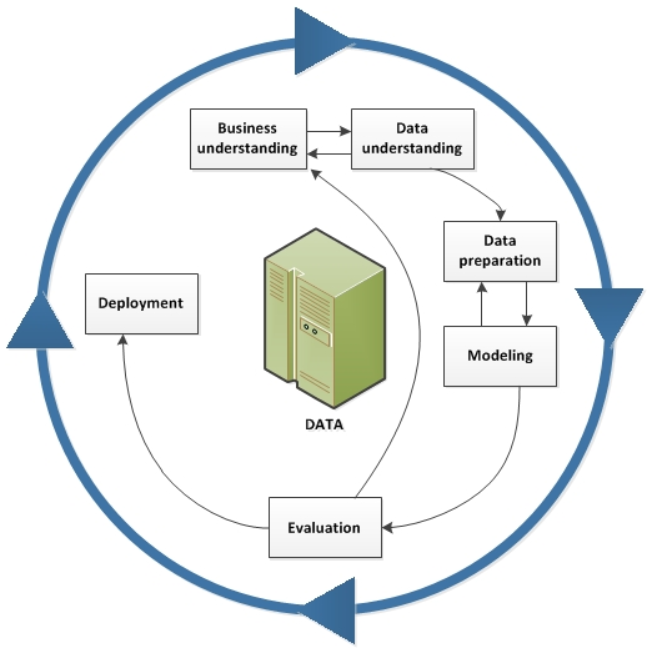
</div>

This methodolgy is an overarhcing workflow style, where upon completing a step in the cycle, the next step is started and so on. Where this model really helps though is that its not linear, meaning if needed, returning to a previous step can assist with assuring a thorough and complete modeling process. 

<a id = 'prep' ></a>

---
# Data Preparation
## Cleaning / Formating
First things first, we need to do some basic data formating, like assigning binary values for some entries like `international plan` or `churn` 

In [8]:
df['international plan'] = df['international plan'].replace({'yes' : 1, 'no' : 0})
df['voice mail plan'] = df['voice mail plan'].replace({'yes' : 1, 'no' : 0})
df['churn'] = df['churn'].replace({True : 1, False : 0})
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## Data Manipulation
### function creation
Here we create some handmade functions to assist with repetitive code blocks. If a code block / section uses a handmade function, there will be a note indicating which one and its finction. 

In [9]:
def area_percent(df, area_code):
    df = df
    area = df[df['area code'] == area_code]
    count = len(area)
    area_churn = area[area['churn'] == True]
    c_count = len(area_churn)
    percent = round((c_count / count) * 100, 2)
    no_churn = len(area) - c_count
    
    if area_code == 415:
        a_c = 'San Fransisco'
    elif area_code == 510:
        a_c = 'Oakland'
    else:
        a_c = 'San Jose'
    
    return 'out of {} cutomers in the {} area code ({}), {} ({}%) have churned, {} have not'.format(count, area_code, 
                                                                                                    a_c, c_count, 
                                                                                                    percent, no_churn)

In [10]:
def inter_percent(df, bool_):
    df = df
    inter_plan = df[df['international plan'] == bool_]
    inter_count = len(inter_plan)
    inter_churn = inter_plan[inter_plan['churn'] == 1]
    churn_count = len(inter_churn)
    percent = round((churn_count / inter_count) * 100, 2)
    
    if bool_ == 1:
        churn_bool = 'do have an international plan'
    else:
        churn_bool = 'do not have an international plan'
   
    return 'out of {} that {}, {} ({}%) churned'.format(inter_count, churn_bool, 
                                                        churn_count, percent) 

In [11]:
def voice_percent(df, bool_):
    df = df
    voice_plan = df[df['voice mail plan'] == bool_]
    voice_count = len(voice_plan)
    voice_churn = voice_plan[voice_plan['churn'] == 1]
    churn_count = len(voice_churn)
    percent = round((churn_count / voice_count) * 100, 2)
    
    if bool_ == 1:
        churn_bool = 'do have a voice mail plan'
    else:
        churn_bool = 'do not have a voice mail plan'
   
    return 'out of {} that {}, {} ({}%) churned'.format(voice_count, churn_bool, 
                                                        churn_count, percent) 

In [12]:
def get_avgs(col):
    data = df[col]
    avg = data.mean()
    max_ = data.max()
    min_ = data.min()
    
    return '{} is the average amount of {}, with {} being the minimum and {} being the maximum'.format(round(avg, 2), col, 
                                                                                                       min_, max_)

In [13]:
def run_model(model, X_train, X_test, y_train, y_test, display=True):
    
    train_r2 = model.score(X_train, y_train)
    y_pred_train = model.predict(X_train)
    train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
    
    test_r2 = model.score(X_test, y_test)
    y_pred_test = model.predict(X_test)
    test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
    
    if (display):
        print('Training R^2:', train_r2)
        print('Training Root Mean Squared Error:', train_rmse)
        print('\n----------------\n')
        print('Testing R^2:', test_r2)
        print('Testing Root Mean Squared Error:', test_rmse)
        
    return test_r2, test_rmse

In [88]:
def scaling_func(df, col):
    df = df
    return scaler.fit_transform(df[col].values.reshape(-1,1))

<a id = 'explore' ></a>

---
# Exploratory Data Analysis

## State Categorical

Let's take a look into the state categorical data so see how many people churned related to this data.

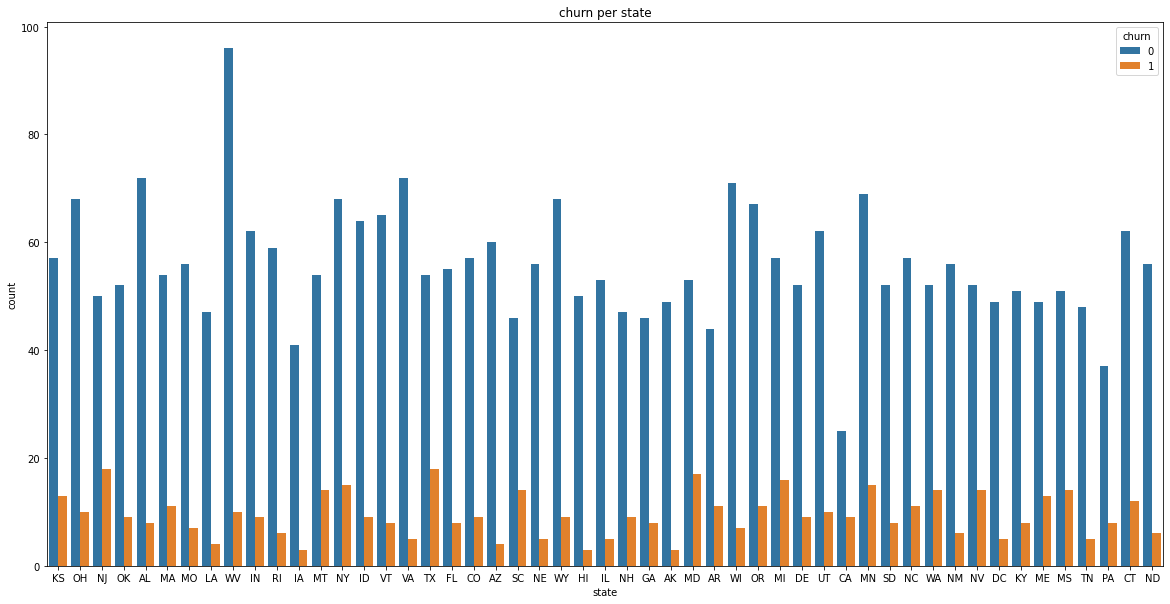

In [14]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = df, x = 'state', hue = 'churn')
ax.set_title('churn per state')
plt.show();

Here we see all the states with their corresponding churn counts. This graph may be a little to much to grasp all at once, so lets look into the top 10 states with the most churn and the top 10 with the least.

In [15]:
df_churn = df[df['churn'] == True].copy()
df_churn.drop(columns = ['international plan', 'voice mail plan'], axis = 1, inplace = True)
churn_top_10 = df_churn.sort_values(by = 'churn').groupby('state').sum()
churn_top_10.sort_values('churn', ascending = False)[:10]

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,
NJ,1708,8093,159,4166.7,1834,708.33,3799.8,1881,323.00,3847.4,1795,173.14,194.3,78,52.49,39,18
TX,1881,8019,57,3895.9,1771,662.31,3859.3,1763,328.06,3879.5,1790,174.58,198.2,85,53.53,30,18
MD,1911,7386,83,3913.4,1664,665.30,3656.2,1716,310.78,3333.4,1484,149.99,193.8,61,52.32,38,17
MI,1908,6686,54,3162.6,1696,537.66,3332.8,1649,283.28,3085.9,1639,138.89,188.0,72,50.76,39,16
MN,1587,6883,82,3124.1,1501,531.12,3210.1,1564,272.87,3002.5,1421,135.12,169.6,49,45.79,41,15
NY,1833,6292,33,2960.7,1413,503.31,2858.5,1448,242.97,2874.1,1566,129.34,171.9,68,46.42,40,15
MT,1474,5965,117,2504.7,1241,425.81,2905.7,1387,246.98,2766.0,1479,124.45,152.5,61,41.20,36,14
NV,1277,6081,90,3016.1,1440,512.75,2998.9,1307,254.90,2799.5,1425,125.97,134.1,47,36.19,30,14
MS,1249,5965,84,2753.3,1573,468.06,2816.0,1453,239.37,3108.0,1446,139.86,142.9,65,38.60,32,14


Below we see a map with the top 10 states with the most churns. A majority of these states are located in the east / south east, with only 2 states within the general west region.

<div>
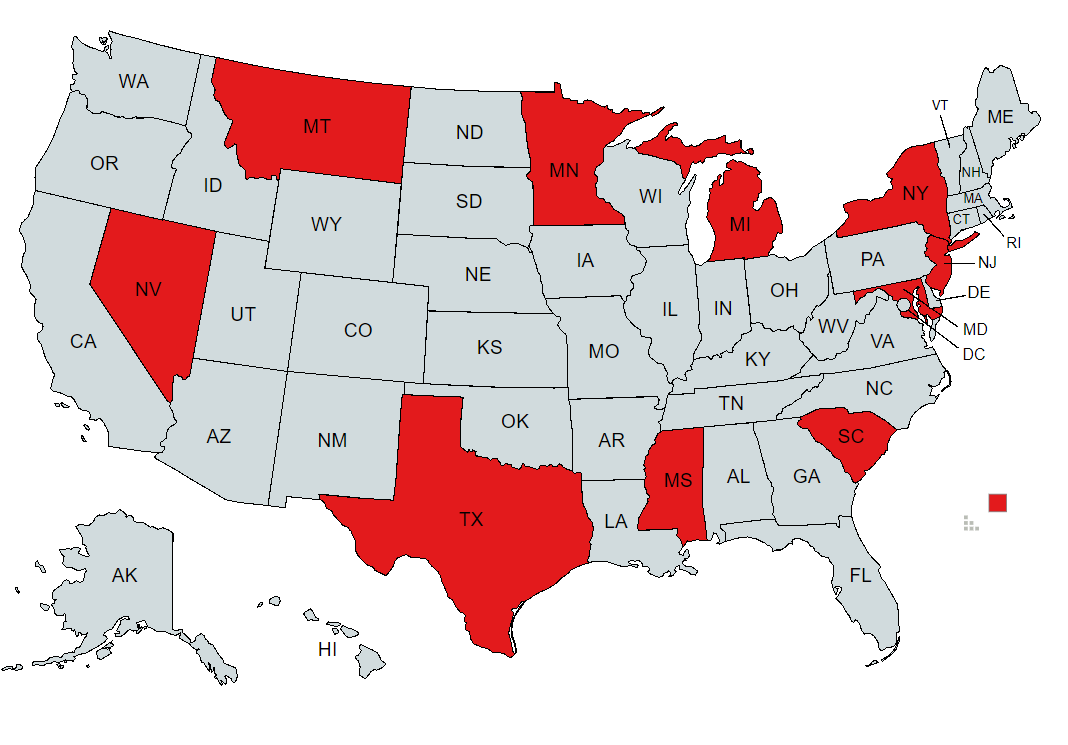
</div>

In [16]:
df_low_churn = df[df['churn'] == True].copy()
churn_top_10_low = df_churn.sort_values(by = 'churn').groupby('state').sum()
churn_top_10_low.sort_values('churn', ascending = True)[:10]

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,
AK,414,1245,0,479.7,270,81.55,494.1,299,42.00,487.5,282,21.95,31.1,6,8.39,10,3
IA,165,1435,0,739.7,395,125.75,507.9,319,43.17,723.5,277,32.56,25.8,12,6.97,9,3
HI,312,1238,0,708.6,330,120.46,731.0,292,62.13,641.0,314,28.84,31.5,15,8.51,9,3
AZ,300,1843,0,800.7,436,136.12,829.0,438,70.46,908.1,409,40.87,40.2,18,10.86,9,4
LA,538,1755,27,650.2,417,110.53,852.2,388,72.44,768.7,385,34.59,41.2,12,11.12,9,4
NE,518,2068,0,1159.3,494,197.09,1115.7,579,94.83,1170.5,550,52.68,58.4,19,15.77,6,5
VA,417,2156,42,914.9,578,155.54,1235.2,503,105.00,1214.7,453,54.66,58.9,25,15.91,8,5
TN,437,2258,65,1044.1,511,177.51,949.4,447,80.70,1044.1,439,46.98,57.0,14,15.39,15,5
DC,346,2061,0,943.0,539,160.31,911.9,449,77.53,1224.5,464,55.11,53.4,21,14.42,9,5


Now we have a map including the states with the lowest churns (in green) with a mojority of states residing within the central america area.

<div>
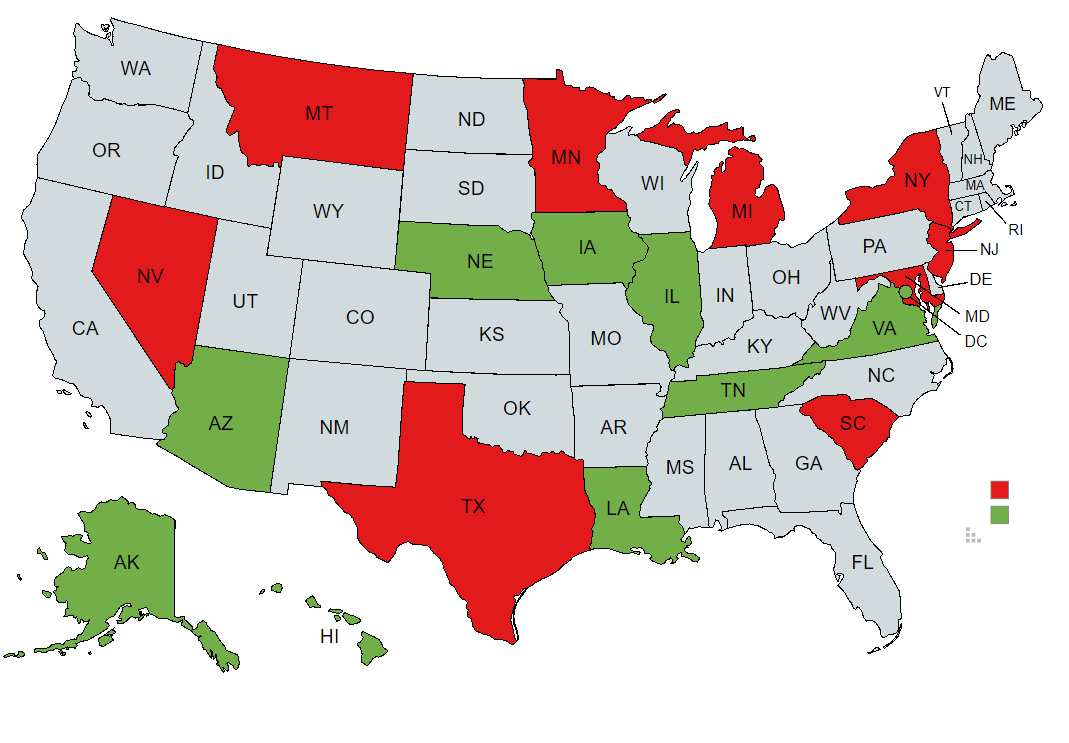
</div>

---
## Area Code Categorical

When it comes to `area code`, we come accross an interesting situation. As shown below, this data sheet has three area codes, with all of them being located within california. This implies this specific company primarily conducts its business in california, while a failry large amount of customers have moved to another state. This could lead to an interesting conclusion, as its possbile that moving to another state could cause a customer to `churn`, as there could be cheaper / more reliable service options within the new living area. California (residing in grey coloring) has a 'middle of the pack' churn rate above.

- 415 - San Fransisco
- 510 - Oakland
- 408 - San Jose

In [17]:
df['area code'].value_counts()

area code
415    1655
510     840
408     838
Name: count, dtype: int64

Let's check out churn rate per these three area codes.

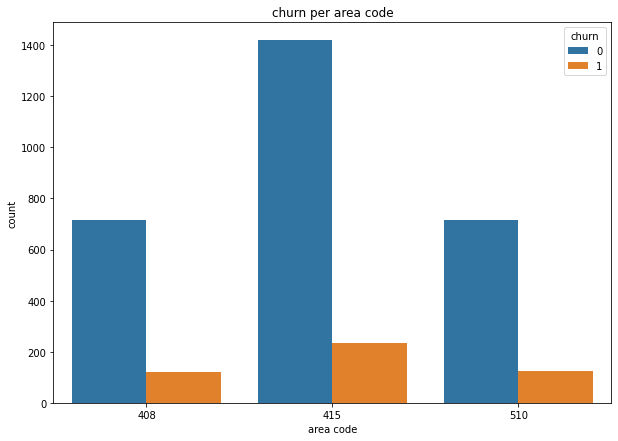

In [18]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(data = df, x = 'area code', hue = 'churn')
ax.set_title('churn per area code')
plt.show();

As we can see, 415 (San Fransisco) has the highest total amount of customers, with 1655 in total. An interesting thing to note is that even though 415 has significantly more customers than the other 2, the churn rate is about 15% for all of them.

function used:
- `area_percent`
    - returns a percentage of how many customers churned per `area code`

In [19]:
area_percent(df, 415)

'out of 1655 cutomers in the 415 area code (San Fransisco), 236 (14.26%) have churned, 1419 have not'

In [20]:
area_percent(df, 510)

'out of 840 cutomers in the 510 area code (Oakland), 125 (14.88%) have churned, 715 have not'

In [21]:
area_percent(df,408)

'out of 838 cutomers in the 408 area code (San Jose), 122 (14.56%) have churned, 716 have not'

---
## International Plan Categorical
This section here just compares how many people churned based on international plan with `0` being did not churn and `1` being did churn

In [22]:
df['international plan'].value_counts()

international plan
0    3010
1     323
Name: count, dtype: int64

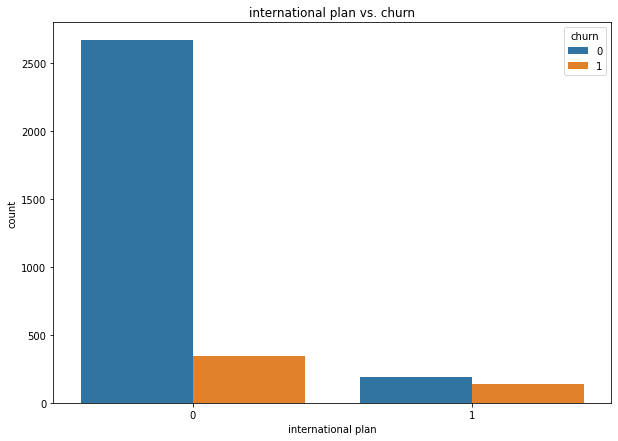

In [23]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(data = df, x = 'international plan', hue = 'churn')
ax.set_title('international plan vs. churn')
plt.show();

function used:
- `inter_percent`
    - returns a percentage of customers who churned based on `international plan`

In [24]:
inter_percent(df, 1)

'out of 323 that do have an international plan, 137 (42.41%) churned'

In [25]:
inter_percent(df, 0)

'out of 3010 that do not have an international plan, 346 (11.5%) churned'

Above we can see that a mojority of customers dont have an international plan, and the ones that do, 42% of them end up churning. This may be a sign that international plans are either over priced, not providing adequate service quality or both.

---
## Voicemail Plan Categorical
This section here just compares how many people churned based on voice-mail plan with 0 being did not churn and 1 being did churn

In [26]:
df['voice mail plan'].value_counts()

voice mail plan
0    2411
1     922
Name: count, dtype: int64

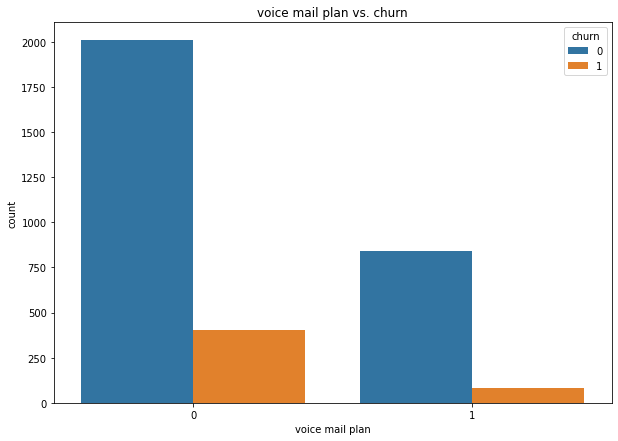

In [27]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(data = df, x = 'voice mail plan', hue = 'churn')
ax.set_title('voice mail plan vs. churn')
plt.show();

function used:
- `voice_percent`
    - returns a percentage of customers who churned based on `voice mail plan`

In [28]:
voice_percent(df, 1)

'out of 922 that do have a voice mail plan, 80 (8.68%) churned'

In [29]:
voice_percent(df, 0)

'out of 2411 that do not have a voice mail plan, 403 (16.72%) churned'

<a id = 'number' ></a>

---
## Numerical data

Let's create a dataframe with just numeric data to make it easier to look into these entries. There is a lot more numeric data than categorical, so for this section we loop through all of the numeric data in a single code block and provide a quick breakdown after.

In [30]:
numeric_data = ['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
      'total night calls', 'total night charge', 'total intl minutes',
      'total intl calls', 'total intl charge', 'customer service calls']

categorical_data = ['state', 'area code', 'international plan', 'voice mail plan']

In [31]:
df_numeric = df.drop(categorical_data, axis = 1)

In [32]:
df_categoric = df.drop(numeric_data, axis = 1)

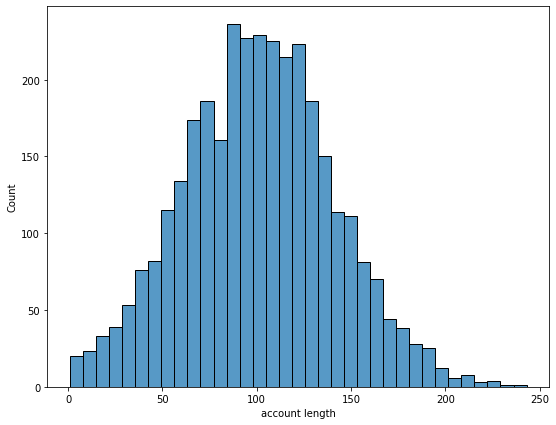

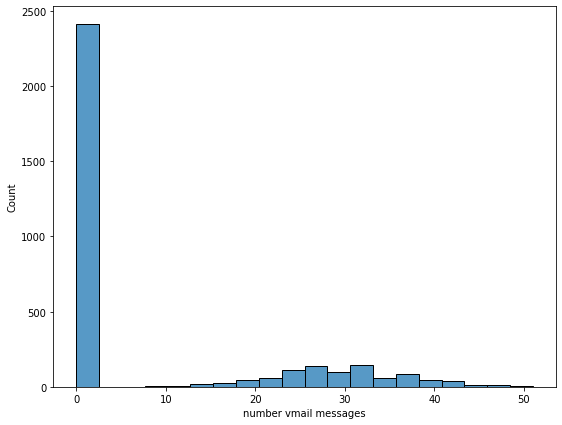

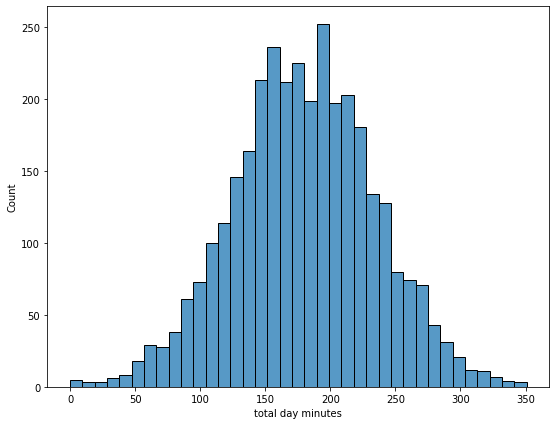

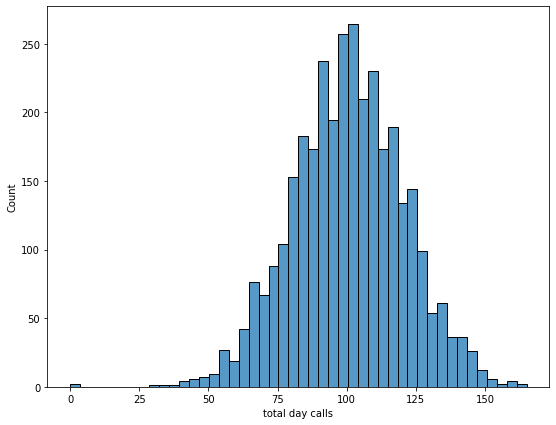

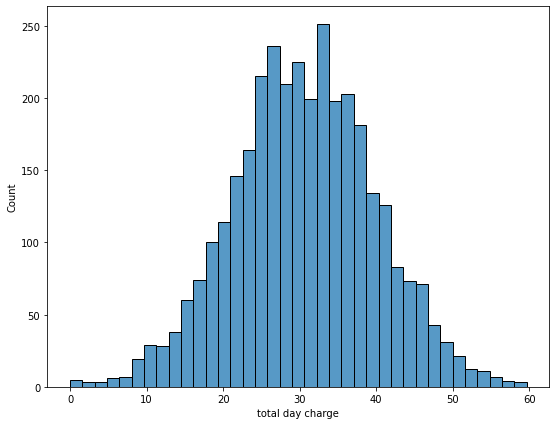

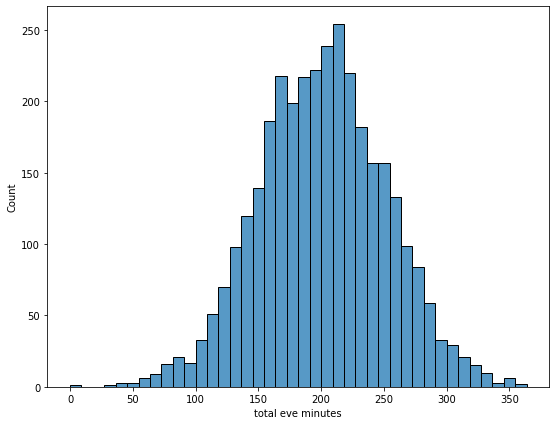

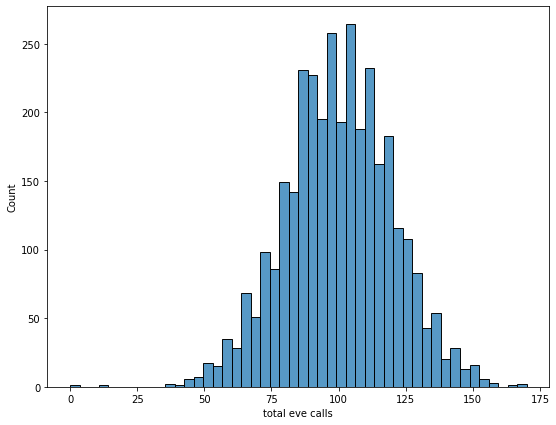

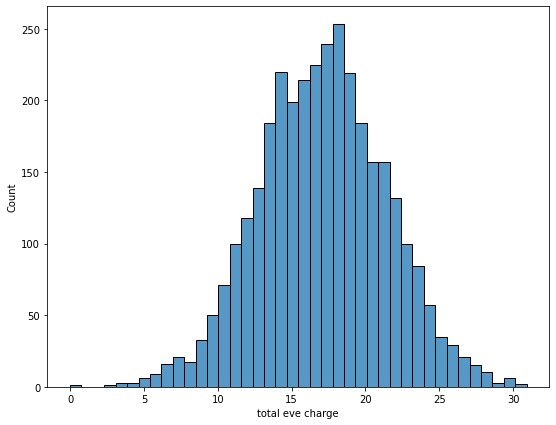

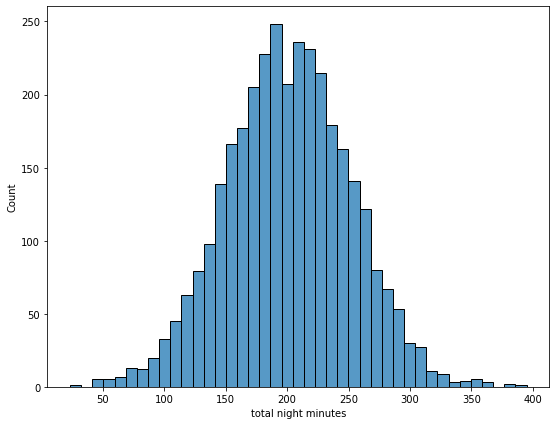

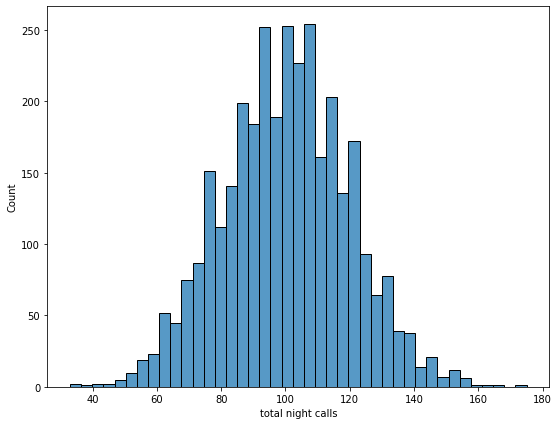

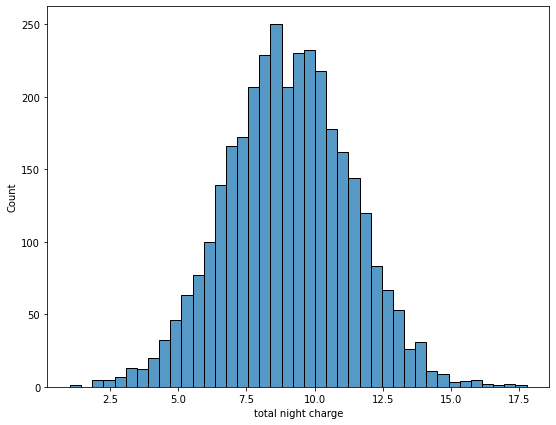

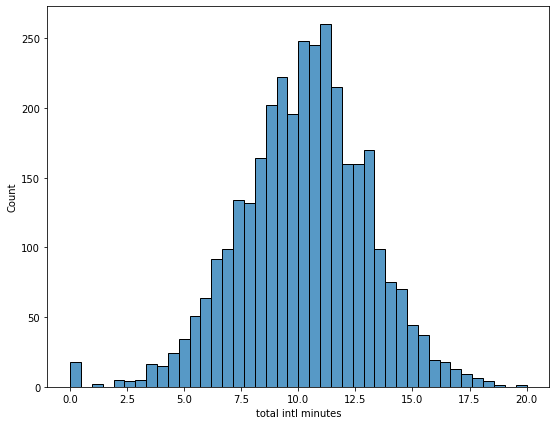

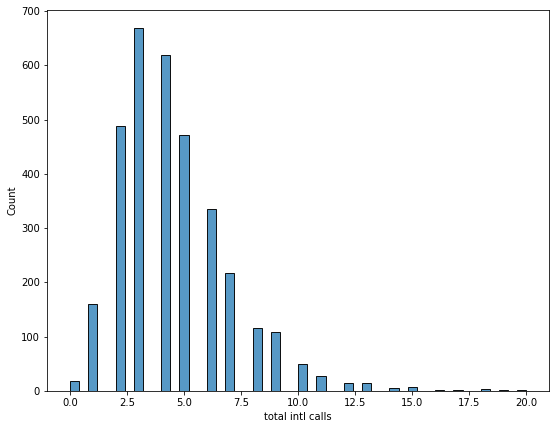

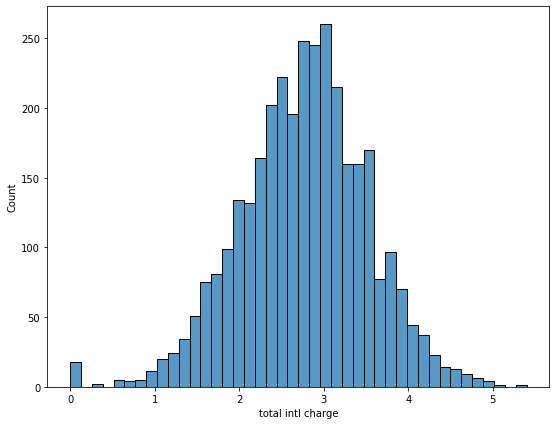

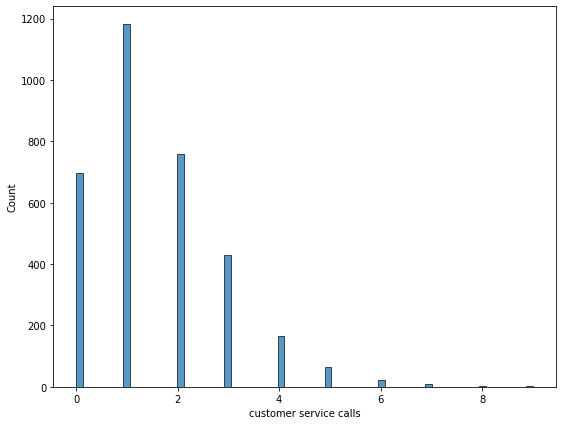

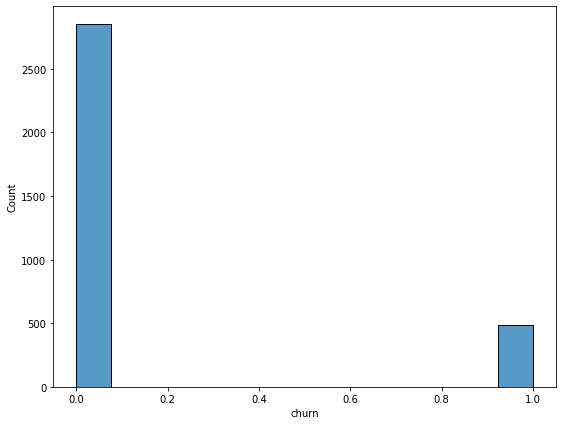

In [33]:
for i in df_numeric:
    fig, ax = plt.subplots(figsize = (9,7))
    sns.histplot(df[i])

## Breakdown

This here is just a simple breakdown of each graph shown above.

function used:
- `get_avgs`
    - returns the average, minimum and maximum data values for the given numerical column

In [34]:
print(get_avgs('account length'))
print('------------------------------------------------------------------------------------------')
print(get_avgs('number vmail messages'))
print('------------------------------------------------------------------------------------------')
print(get_avgs('total day minutes'))
print('------------------------------------------------------------------------------------------')
print(get_avgs('total day calls'))
print('------------------------------------------------------------------------------------------')
print(get_avgs('total day charge'))
print('------------------------------------------------------------------------------------------')
print(get_avgs('total eve minutes'))
print('------------------------------------------------------------------------------------------')
print(get_avgs('total eve calls'))
print('------------------------------------------------------------------------------------------') 
print(get_avgs('total eve charge'))
print('------------------------------------------------------------------------------------------') 
print(get_avgs('total night minutes'))
print('------------------------------------------------------------------------------------------') 
print(get_avgs('total night calls'))
print('------------------------------------------------------------------------------------------') 
print(get_avgs('total night charge'))
print('------------------------------------------------------------------------------------------')
print(get_avgs('total intl minutes'))
print('------------------------------------------------------------------------------------------')
print(get_avgs('total intl calls'))
print('------------------------------------------------------------------------------------------') 
print(get_avgs('total intl charge'))
print('------------------------------------------------------------------------------------------')
print(get_avgs('customer service calls'))

101.06 is the average amount of account length, with 1 being the minimum and 243 being the maximum
------------------------------------------------------------------------------------------
8.1 is the average amount of number vmail messages, with 0 being the minimum and 51 being the maximum
------------------------------------------------------------------------------------------
179.78 is the average amount of total day minutes, with 0.0 being the minimum and 350.8 being the maximum
------------------------------------------------------------------------------------------
100.44 is the average amount of total day calls, with 0 being the minimum and 165 being the maximum
------------------------------------------------------------------------------------------
30.56 is the average amount of total day charge, with 0.0 being the minimum and 59.64 being the maximum
------------------------------------------------------------------------------------------
200.98 is the average amount of to

<a id = 'mprep' ></a>

---
# Model Preparation

## OHE
Our first step will be to turn all categorical data into `One-Hot encoded` data, which simply means it splits the data into new columns where 1 = True and 0 = False, allowing for classification models to work properly. An example showcased below is for the `state` column. Before it was simply stating what state the customer is in, but now every entry has a specific column for each state, with only the correct state per customer having a 1 in its place.

In [35]:
ohe_df = pd.get_dummies(df, columns = categorical_data, drop_first = True, dtype = int)

In [36]:
ohe_df.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510,international plan_1,voice mail plan_1
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,1,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,0,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,1,0,1,0


In [37]:
ohe_df.columns

Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn', 'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO',
       'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI',
       'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY',
       'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN',
       'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE',
       'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH',
       'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD',
       'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA',
       'state_WI',

---
## Scaling
Scaling turns all given column imputs into the same 'scale' to assist the model with understanding whats going on. In this case we will use `MinMaxScaler` to turn all values into a number between 0 and 1. While this may not make sense from our perspective, this really helps the model.

function used:
- `scaling_func`
    - scales the given dataframe and what column to scale

In [38]:
scaler = MinMaxScaler()

for i in ohe_df.select_dtypes(include = [np.number]).columns:
    ohe_df[i] = scaling_func(ohe_df, i)
ohe_df.head()


,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510,international plan_1,voice mail plan_1
0,0.524793,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.438017,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.561983,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.342975,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.305785,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


---
## Train Test Split 
`Train-test split` simply devides the dataset into a train portion and a test portion. This is done to firstly train a model with the train data, then use that model on the test data to see how well the model works in a near real-world application.

In [39]:
seed = 13
y = ohe_df['churn']
y = list(y)
x = ohe_df.drop('churn', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = seed)

In [87]:
x_train.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510,international plan_1,voice mail plan_1
2631,0.669421,0.431373,0.613170,0.551515,0.613179,0.381908,0.600000,0.382077,0.330823,0.535211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
665,0.458678,0.431373,0.518244,0.666667,0.518276,0.627165,0.723529,0.627305,0.644164,0.760563,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1977,0.198347,0.000000,0.677879,0.557576,0.677901,0.574374,0.700000,0.574571,0.388919,0.373239,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1032,0.355372,0.000000,0.669327,0.515152,0.669349,0.387407,0.535294,0.387577,0.487090,0.422535,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
807,0.227273,0.588235,0.362315,0.539394,0.362341,0.473192,0.682353,0.473310,0.461001,0.549296,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


<a id = 'mba' ></a>

---
# Model Building and Analysis

# Model #1
## Logistic Regression

Our first model will be a logistic regression model. This model will be used as a baseline for other models to compare against to see if they are improved over this one. This model will contain only the base scaling and OHE changes so that we can alter subsequent iterations of the model. 

In [40]:
lr = LogisticRegression(C= 1e12, solver = 'liblinear')
model_log = lr.fit(x_train, y_train)
y_lr_pred_train = lr.predict(x_train)

In [41]:
train_resids = np.abs(y_train - y_lr_pred_train)

In [42]:
print(pd.Series(train_resids, name = "Residuals (counts)").value_counts())
print('-------------------------')
print(pd.Series(train_resids, name = "Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0.0    2174
1.0     325
Name: count, dtype: int64
-------------------------
Residuals (proportions)
0.0    0.869948
1.0    0.130052
Name: proportion, dtype: float64


## Model Test

This model is doing pretty well, being about 87% correct on training data. Now we can use this on the test data to see how it fairs with unseen data.

In [43]:
y_lr_pred_test = lr.predict(x_test)

test_residuals = np.abs(y_test - y_lr_pred_test)
print(pd.Series(test_residuals, name = "Residuals (counts)").value_counts())
print('-------------------------')
print(pd.Series(test_residuals, name = "Residuals (proportions)").value_counts(normalize = True))

Residuals (counts)
0.0    710
1.0    124
Name: count, dtype: int64
-------------------------
Residuals (proportions)
0.0    0.851319
1.0    0.148681
Name: proportion, dtype: float64


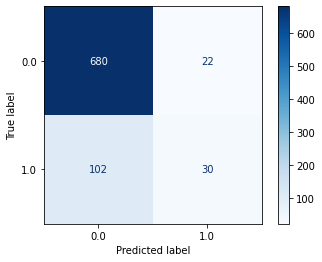

In [44]:
cf = confusion_matrix(y_test, y_lr_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = model_log.classes_)
disp.plot(cmap = plt.cm.Blues)
plt.grid(False)

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, y_lr_pred_test)
roc_auc = auc(fpr, tpr)

AUC: 0.597966847966848


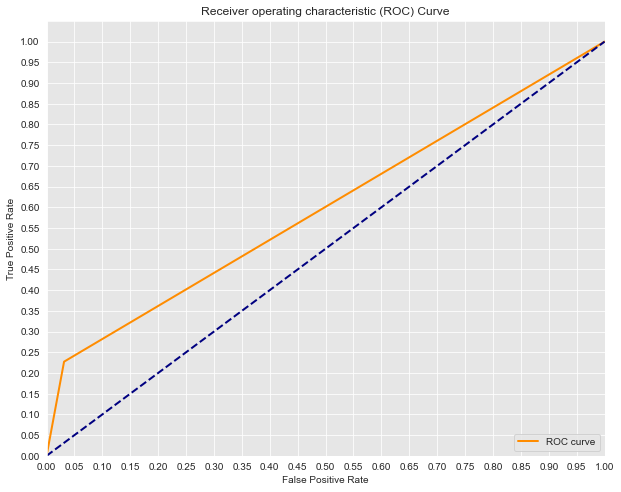

In [46]:
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The confusion matrix above shows that it predicts true negatives really well, but does have a higher then desirable false negative rate.This model also tested failry well, being about 85% correct on training data. While this is good, we can try altering a few things and even try different models to see whats the best fit. The above graph also indicates this model needs some work, as the orange line is supposed to be hugging the upper left corner to indicate a well made model.

---
## SMOTE

Smote balances the minority class (churn) with the majority class (no churn) to help with over fitting.

In [47]:
smote = SMOTE()
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

Now let's run the above model again to see if we get an improvement 

In [48]:
model_log_re = lr.fit(x_train_resampled, y_train_resampled)
y_lr_pred_train_re = lr.predict(x_train_resampled)
train_resids_re = np.abs(y_train_resampled - y_lr_pred_train_re)

In [49]:
print(pd.Series(train_resids_re, name = "Residuals (counts)").value_counts())
print('-------------------------')
print(pd.Series(train_resids_re, name = "Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0.0    3414
1.0     882
Name: count, dtype: int64
-------------------------
Residuals (proportions)
0.0    0.794693
1.0    0.205307
Name: proportion, dtype: float64


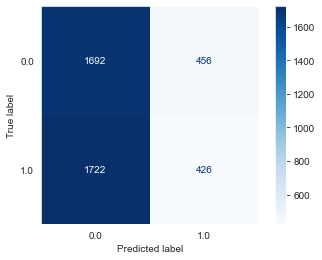

In [50]:
cf = confusion_matrix(y_train_resampled, train_resids_re)
disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=model_log.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)

In [51]:
model_log = lr.fit(x_train_resampled, y_train_resampled)
y_lr_pred_test_re = lr.predict(x_test)

In [52]:
test_residuals = np.abs(y_test - y_lr_pred_test_re)

print(pd.Series(test_residuals, name = "Residuals (counts)").value_counts())
print('-------------------------')
print(pd.Series(test_residuals, name = "Residuals (proportions)").value_counts(normalize = True))

Residuals (counts)
0.0    618
1.0    216
Name: count, dtype: int64
-------------------------
Residuals (proportions)
0.0    0.741007
1.0    0.258993
Name: proportion, dtype: float64


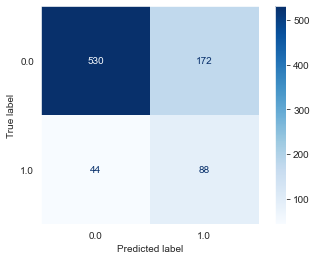

In [53]:
cf = confusion_matrix(y_test, y_lr_pred_test_re)
disp = ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = model_log.classes_)
disp.plot(cmap = plt.cm.Blues)
plt.grid(False)

In [54]:
fpr, tpr, thresholds = roc_curve(y_test, y_lr_pred_test_re)
roc_auc = auc(fpr, tpr)
roc_auc

0.7108262108262109

AUC: 0.7108262108262109


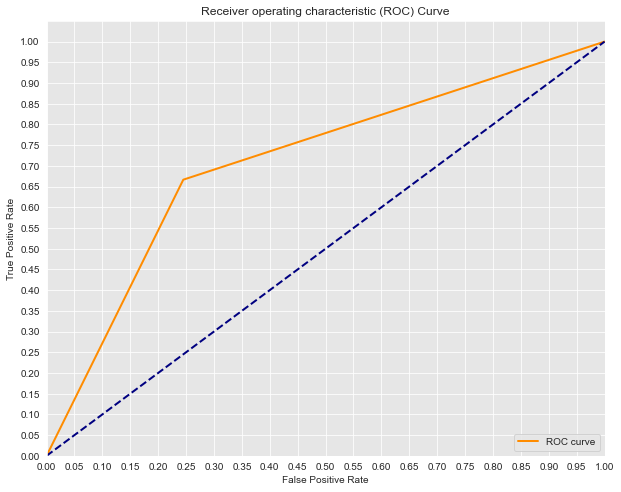

In [55]:
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

This modeling technique did not improve our model, and once again, the orange line above is not where we want it to be. Lets look into some feature selection techniques to see what we can do.

<a id = 'feature' ></a>

---
## Feature selection

### Variance Threshold
Variance Threshold removes features with low variance, which is the spread of the data points.

In [56]:
vt = VarianceThreshold()
reduced_feature_train = pd.DataFrame(vt.fit_transform(x_train), 
                                     columns=x_train.columns, index=x_train.index)
reduced_feature_test = pd.DataFrame(vt.transform(x_test), columns=x_test.columns, index=x_test.index)

ranges = np.linspace(np.percentile(vt.variances_,10), np.percentile(vt.variances_, 90), 10)
threshold_ranges = ranges

lr = LogisticRegression( C= 1e12, solver = 'liblinear')
lr.fit(x_train, y_train)
r2, rmse = run_model(lr, x_train, x_test, y_train, y_test)

reduced_r2s = []
for thresh in threshold_ranges:
    selector = VarianceThreshold(thresh)
    reduced_feature_train = selector.fit_transform(x_train)
    reduced_feature_test = selector.transform(x_test)
    lr = LogisticRegression(C= 1e12, solver = 'liblinear')
    lr.fit(reduced_feature_train, y_train)
    reduced_r2, reduced_rmse = run_model(lr, reduced_feature_train, reduced_feature_test, 
                                         y_train, y_test, display=False)
    reduced_r2s.append(reduced_r2)
    
    print('Variance threshold:', thresh)
    print(f"{reduced_feature_train.shape[1]} out of {x_train.shape[1]} features used")
    print('Baseline R-Squared:', round(r2, 2))
    print('Reduced R-Squared: ', round(reduced_r2, 2))
    print('\n--------------------------------------------------------------------\n')

Training R^2: 0.8699479791916767
Training Root Mean Squared Error: 0.3606272602124295

----------------

Testing R^2: 0.8513189448441247
Testing Root Mean Squared Error: 0.3855918245449134
Variance threshold: 0.014673527105471923
62 out of 69 features used
Baseline R-Squared: 0.85
Reduced R-Squared:  0.85

--------------------------------------------------------------------

Variance threshold: 0.015795753791369504
59 out of 69 features used
Baseline R-Squared: 0.85
Reduced R-Squared:  0.85

--------------------------------------------------------------------

Variance threshold: 0.016917980477267083
54 out of 69 features used
Baseline R-Squared: 0.85
Reduced R-Squared:  0.86

--------------------------------------------------------------------

Variance threshold: 0.01804020716316466
52 out of 69 features used
Baseline R-Squared: 0.85
Reduced R-Squared:  0.86

--------------------------------------------------------------------

Variance threshold: 0.019162433849062244
40 out of 69 fe

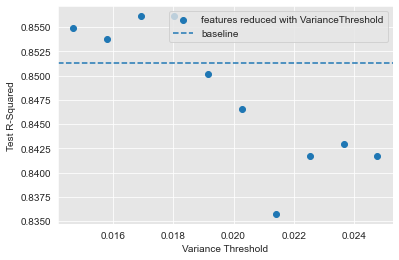

In [57]:
fig, ax = plt.subplots()
ax.scatter(threshold_ranges, reduced_r2s, label="features reduced with VarianceThreshold")
ax.axhline(y=r2, linestyle="--", label="baseline")
ax.set_xlabel("Variance Threshold")
ax.set_ylabel("Test R-Squared")
ax.legend();

This specific technique did not fair well, as we want the most possible features to be above the blue dashed line.

### SelectKBest
The feature selector used here is `SelectKBest` using a statistic called `f_regression`. The difference here is that `variance threshold` looks at the feature values, where as `SelectKBest` compares each feature indiviually one by one to a specifies statistic, then selects the top performing features.

In [58]:
selector = SelectKBest(score_func=f_regression)
X_k_best_train = selector.fit_transform(x_train, y_train)
X_k_best_test = selector.transform(x_test)
lr = LogisticRegression(C= 1e12, solver = 'liblinear')
lr.fit(X_k_best_train, y_train)
k_best_r2, k_best_rmse = run_model(lr, X_k_best_train, X_k_best_test, y_train, y_test)

print('\n----------------\n')
print(f"{X_k_best_train.shape[1]} out of {x_train.shape[1]} features used")
print('Baseline R-Squared:', round(r2, 2))
print('Reduced R-Squared: ', round(k_best_r2, 2))

Training R^2: 0.8615446178471389
Training Root Mean Squared Error: 0.3720959313844498

----------------

Testing R^2: 0.8573141486810552
Testing Root Mean Squared Error: 0.37773780763771164

----------------

10 out of 69 features used
Baseline R-Squared: 0.85
Reduced R-Squared:  0.86


`mutual_info_regression` is another statistic that can be used with `SelectKBest` with varying results.

In [59]:
selector = SelectKBest(score_func=mutual_info_regression)
X_k_best_train = selector.fit_transform(x_train, y_train)
X_k_best_test = selector.transform(x_test)
lr = LogisticRegression(C= 1e12, solver = 'liblinear')
lr.fit(X_k_best_train, y_train)
k_best_r2, k_best_rmse = run_model(lr, X_k_best_train, X_k_best_test, y_train, y_test)

print('\n----------------\n')
print(f"{X_k_best_train.shape[1]} out of {x_train.shape[1]} features used")
print('Baseline R-Squared:', round(r2, 2))
print('Reduced R-Squared: ', round(k_best_r2, 2))

Training R^2: 0.8555422168867547
Training Root Mean Squared Error: 0.38007602280760266

----------------

Testing R^2: 0.8465227817745803
Testing Root Mean Squared Error: 0.3917616854995134

----------------

10 out of 69 features used
Baseline R-Squared: 0.85
Reduced R-Squared:  0.85


`f_regression` was slightly better. Lets go ahead and run it through a loop to see how it performes with different values for `k` 

In [60]:
ks = np.arange(1, len(x_train.columns), 10)
reduced_r2s = []
for k in ks:
    selector = SelectKBest(score_func=f_regression, k=k)
    X_k_best_train = selector.fit_transform(x_train, y_train)
    X_k_best_test = selector.transform(x_test)
    lr = LogisticRegression(C= 1e12, solver = 'liblinear')
    lr.fit(X_k_best_train, y_train)
    k_best_r2, k_best_rmse = run_model(lr, X_k_best_train, X_k_best_test, y_train, y_test, display=False)
    reduced_r2s.append(k_best_r2)

    print(f"{k} out of {x_train.shape[1]} features used")
    print('Baseline R-Squared:', round(r2, 2))
    print('Reduced R-Squared: ', round(k_best_r2, 2))
    print('\n--------------------------------------------------------------------\n')

1 out of 69 features used
Baseline R-Squared: 0.85
Reduced R-Squared:  0.84

--------------------------------------------------------------------

11 out of 69 features used
Baseline R-Squared: 0.85
Reduced R-Squared:  0.85

--------------------------------------------------------------------

21 out of 69 features used
Baseline R-Squared: 0.85
Reduced R-Squared:  0.86

--------------------------------------------------------------------

31 out of 69 features used
Baseline R-Squared: 0.85
Reduced R-Squared:  0.86

--------------------------------------------------------------------

41 out of 69 features used
Baseline R-Squared: 0.85
Reduced R-Squared:  0.86

--------------------------------------------------------------------

51 out of 69 features used
Baseline R-Squared: 0.85
Reduced R-Squared:  0.86

--------------------------------------------------------------------

61 out of 69 features used
Baseline R-Squared: 0.85
Reduced R-Squared:  0.85

-----------------------------------

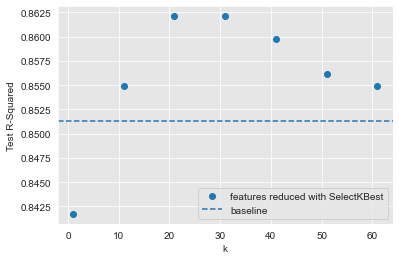

In [61]:
fig, ax = plt.subplots()
ax.scatter(ks, reduced_r2s, label="features reduced with SelectKBest")
ax.axhline(y=r2, linestyle="--", label="baseline")
ax.set_xlabel("k")
ax.set_ylabel("Test R-Squared")
ax.legend(loc="lower right");

Lets go ahead and create a model with this selector incorporated into the model.

In [62]:
lr = LogisticRegression(C= 1e12, solver = 'liblinear')

selector = SelectKBest(score_func=f_regression, k = 21)
x_k_best_train = selector.fit_transform(x_train, y_train)
x_k_best_test = selector.transform(x_test)

lr.fit(x_k_best_test, y_test)
y_k_pred = lr.predict(x_k_best_test)

In [63]:
test_residuals = np.abs(y_test - y_lr_pred_test)
print(pd.Series(test_residuals, name = "Residuals (counts)").value_counts())
print('-------------------------')
print(pd.Series(test_residuals, name = "Residuals (proportions)").value_counts(normalize = True))

Residuals (counts)
0.0    710
1.0    124
Name: count, dtype: int64
-------------------------
Residuals (proportions)
0.0    0.851319
1.0    0.148681
Name: proportion, dtype: float64


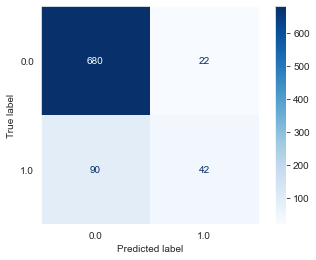

In [64]:
cf = confusion_matrix(y_test, y_k_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = model_log.classes_)
disp.plot(cmap = plt.cm.Blues)
plt.grid(False)

In [65]:
fpr, tpr, thresholds = roc_curve(y_test, y_k_pred)
roc_auc = auc(fpr, tpr)

AUC: 0.6434213934213933


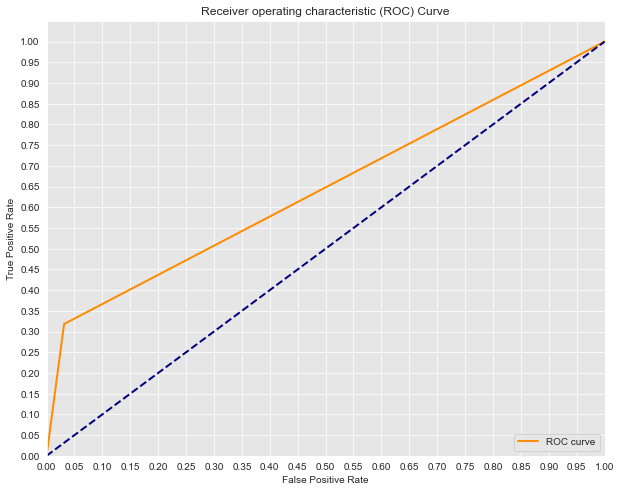

In [66]:
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

While `SelectKBest` worked well in some areas, we still are not getting the results we are looking for. Lets try a few more selectors to see if we can get an improvement, and if not, try a different model type entirely.

---
## RFE
`RFE` reduces the number of features down to 50% of the original features.

In [67]:
feature_ns = np.arange(1, len(x_train.columns), 10)
reduced_r2s = []
for n in feature_ns:
    rfe = RFE(LogisticRegression(C= 1e12, solver = 'liblinear'), n_features_to_select=n)
    X_rfe_train = rfe.fit_transform(x_train, y_train)
    X_rfe_test = rfe.transform(x_test)
    lr = LogisticRegression(C= 1e12, solver = 'liblinear')
    lr.fit(X_rfe_train, y_train)
    rfe_r2, rfe_rmse = run_model(lr, X_rfe_train, X_rfe_test, y_train, y_test, display=False)
    reduced_r2s.append(rfe_r2)

    print(f"{n} out of {x_train.shape[1]} features used")
    print('Baseline R-Squared:', round(r2, 2))
    print('Reduced R-Squared: ', round(rfe_r2, 2))
    print('\n--------------------------------------------------------------------\n')

1 out of 69 features used
Baseline R-Squared: 0.85
Reduced R-Squared:  0.84

--------------------------------------------------------------------

11 out of 69 features used
Baseline R-Squared: 0.85
Reduced R-Squared:  0.85

--------------------------------------------------------------------

21 out of 69 features used
Baseline R-Squared: 0.85
Reduced R-Squared:  0.86

--------------------------------------------------------------------

31 out of 69 features used
Baseline R-Squared: 0.85
Reduced R-Squared:  0.86

--------------------------------------------------------------------

41 out of 69 features used
Baseline R-Squared: 0.85
Reduced R-Squared:  0.85

--------------------------------------------------------------------

51 out of 69 features used
Baseline R-Squared: 0.85
Reduced R-Squared:  0.85

--------------------------------------------------------------------

61 out of 69 features used
Baseline R-Squared: 0.85
Reduced R-Squared:  0.85

-----------------------------------

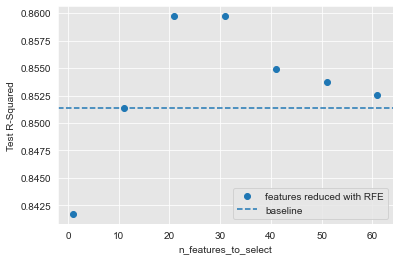

In [68]:
fig, ax = plt.subplots()
ax.scatter(feature_ns, reduced_r2s, label="features reduced with RFE")
ax.axhline(y=r2, linestyle="--", label="baseline")
ax.set_xlabel("n_features_to_select")
ax.set_ylabel("Test R-Squared")
ax.legend(loc="lower right");

---
### RFECV
`RFECV` does the same thing, but cross-validates and fits multiple models for each number of features. 

In [69]:
rfe_cv = RFECV(LogisticRegression(C= 1e12, solver = 'liblinear'), cv=15)
X_rfe_train = rfe_cv.fit_transform(x_train, y_train)
X_rfe_test = rfe_cv.transform(x_test)
lr = LogisticRegression(C= 1e12, solver = 'liblinear')
lr.fit(X_rfe_train, y_train)

rfe_r2, rfe_rmse = run_model(lr, X_rfe_train, X_rfe_test, y_train, y_test)
print('\n----------------\n')
print(f"{X_rfe_train.shape[1]} out of {x_train.shape[1]} features used")
print('Baseline R-Squared:', round(r2, 2))
print('Reduced R-Squared: ', round(rfe_r2, 2))

Training R^2: 0.8715486194477791
Training Root Mean Squared Error: 0.35840114474178353

----------------

Testing R^2: 0.854916067146283
Testing Root Mean Squared Error: 0.38089884858544404

----------------

38 out of 69 features used
Baseline R-Squared: 0.85
Reduced R-Squared:  0.85


---
### LassoCV
Lastly we'll use `LassoCV` to determine the best regularization peramater (how much to penalize our function). The optimal alpha for lasso regression is almost negligible, as .003

In [70]:
lasso = LassoCV(max_iter=10000, cv=15)

lasso.fit(x_train, y_train)
lasso_r2, lasso_rmse = run_model(lasso, x_train, x_test, y_train, y_test)

print('\n----------------\n')
print('The optimal alpha for the lasso regression is: ', lasso.alpha_)
print(f"{sum(abs(lasso.coef_) < 10**(-10))} out of {x_train.shape[1]} features used")
print('Baseline R-Squared:', round(r2, 2))
print('Reduced R-Squared: ', round(lasso_r2, 2))

Training R^2: 0.18442644466947045
Training Root Mean Squared Error: 0.3137877668092433

----------------

Testing R^2: 0.19319265526128648
Testing Root Mean Squared Error: 0.3278493995497437

----------------

The optimal alpha for the lasso regression is:  0.0008684134450218325
37 out of 69 features used
Baseline R-Squared: 0.85
Reduced R-Squared:  0.19


<a id = 'm2' ></a>

---
# Model #2
## Decision Tree Classifier
This type of model (in simple terms) asks a question, and dependant on the answer, makes a decision on how that information should be treated. An example would be predicting the type of car a person may want to purchase. The first 'question' could be some thing like 'is this person male or female'. Then the next question could be 'are they younger than 30' and so on. This will eventually create a 'tree like' model that for every entry its given, asks specified questions and eventually ends with an output that is essentially the models prediction.

In [71]:
dt = DecisionTreeClassifier(random_state = seed)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=13)

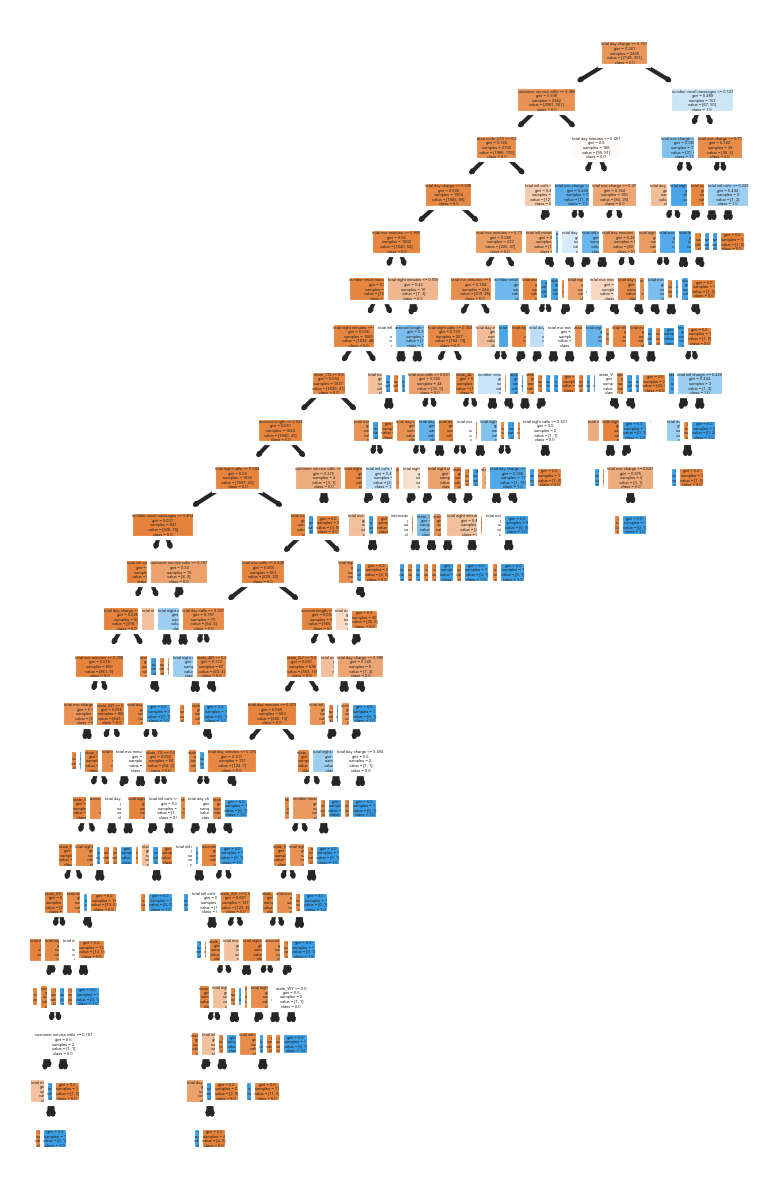

In [72]:
fig, ax = plt.subplots(nrows = 1, ncols = 1,figsize = (3,5), dpi = 300)

tree.plot_tree(dt,
              feature_names = ohe_df.columns,
              class_names = np.unique(y).astype('str'),
              filled = True)
plt.show();

As you can see, this decision tree is extremely large, and also impossible to read. Let's take a few metrics from this tree just to see how it performed, then we'll clean it up a little by limiting it.

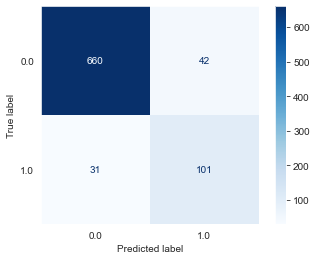

In [73]:
y_pred_dt = dt.predict(x_test)
cf = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = model_log.classes_)
disp.plot(cmap = plt.cm.Blues)
plt.grid(False)

In [74]:
print('accuracy :', accuracy_score(y_test, y_pred_dt))

accuracy : 0.9124700239808153


In [75]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
roc_auc = auc(fpr, tpr)

AUC: 0.8526612276612276


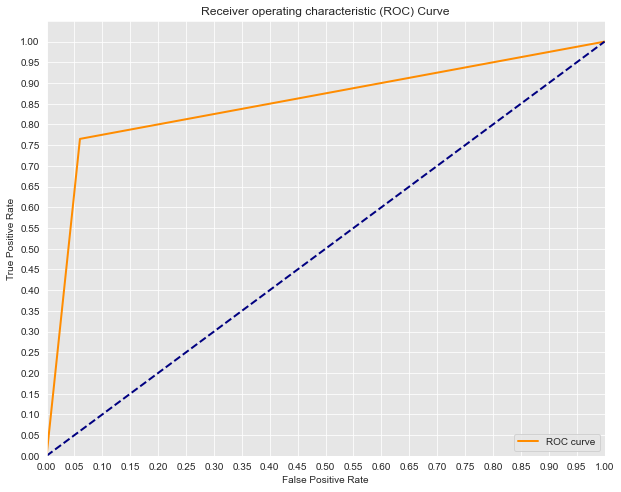

In [76]:
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

As we can see, this model performed significantly better then the logistic regression model, with the roc curve being closer to what we want (hugging the upper left corner).

---
## Limiting Each Metric
`DecisionTreeClassifier` has several metrics that can be used to tune the model. These metrics are:
- max depth
    - how deep or large we want the tree to be


- minimum sample split
    - minimum number of samples required to split an internal node


- minimum sample leafs
    - minimum samples we want a leaf to contain


- maximum features
    - maximum features we want the tree to include


This section focusus on limiting several parameters to see if using specifc data can help the model perform better.

---
### Max Depth

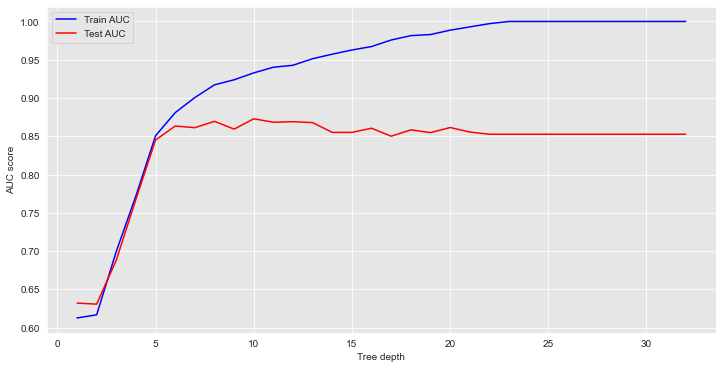

In [77]:
max_depths = list(range(1, 33))
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth = max_depth, random_state= seed)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label = 'Train AUC')
plt.plot(max_depths, test_results, 'r', label = 'Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

understanding the graph:
- training error decreases with increasing tree depth - clear sign of overfitting
- test error decreases after depth = 3
- training and test errors decrease rapidly between the depths of 2 and 5

5 appears to be the best tree depth

---
### Minimum Sample Split

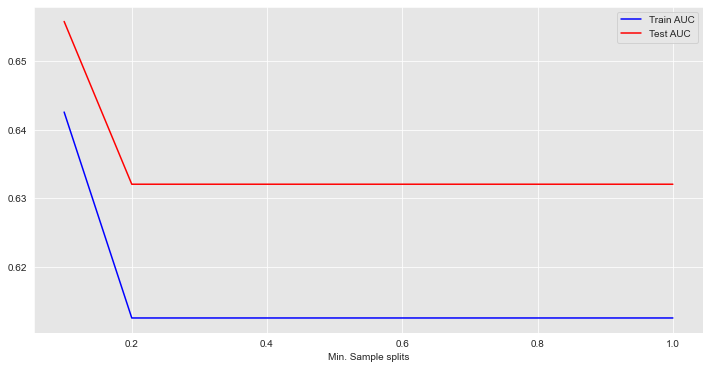

In [78]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split = min_samples_split, random_state = seed)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label = 'Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label = 'Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

Understanding the graph:
- both stabalize as 0.2

---
### Minimum Sample Leaf

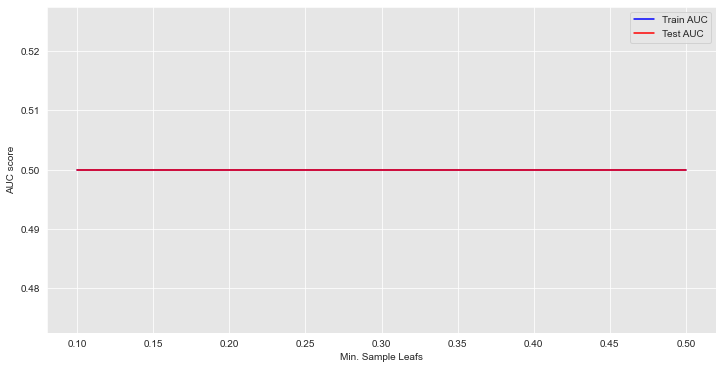

In [79]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf = min_samples_leaf, random_state = seed)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
plt.figure(figsize = (12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label = 'Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label = 'Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

Understanding the graph:
- min. sample leafs appear to not have an effect 

---
### Max Features

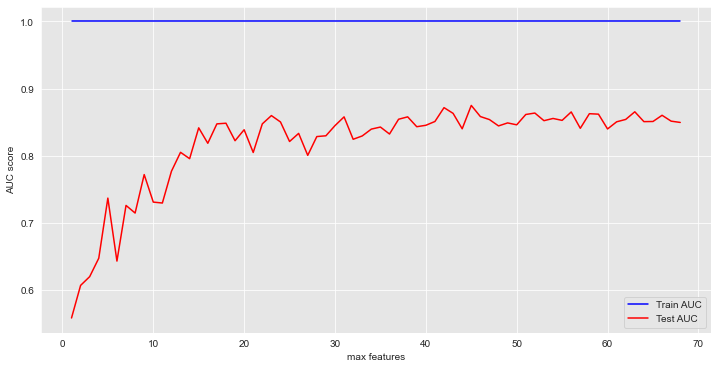

In [80]:
max_features = list(range(1, x_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(max_features = max_feature, random_state = seed)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize = (12,6))
plt.plot(max_features, train_results, 'b', label = 'Train AUC')
plt.plot(max_features, test_results, 'r', label = 'Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

Understanding the graph:
- no clear effect on training dataset, flat AUC
- highets test auc seen at 45

Lets re run the model with the new limitations and see how it does.

<a id = 'mv2' ></a>

---
## Model V2

In [81]:
dt = DecisionTreeClassifier(max_features = 45,
                           max_depth = 5,
                           min_samples_split = 0.2, 
                           random_state = seed)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7293123543123543

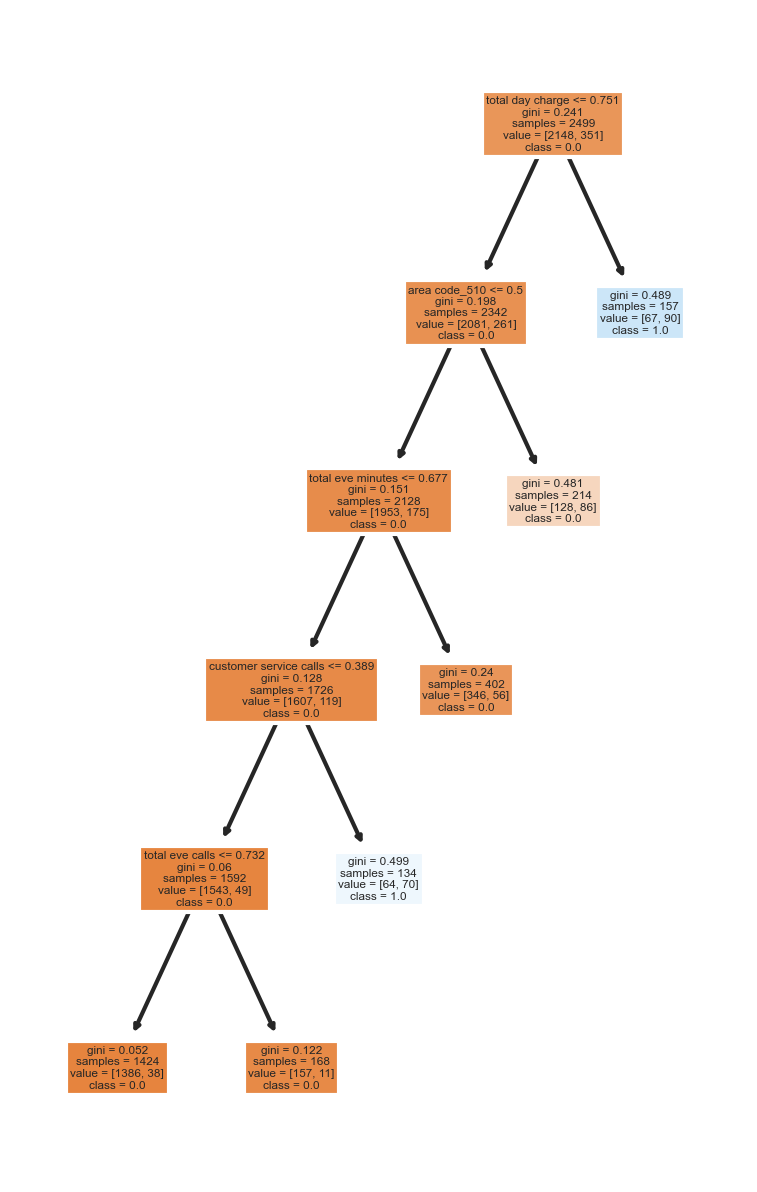

In [82]:
fig, ax = plt.subplots(nrows = 1, ncols = 1,figsize = (3,5), dpi = 300)

tree.plot_tree(dt,
              feature_names = ohe_df.columns,
              class_names = np.unique(y).astype('str'),
              filled = True)
plt.show();

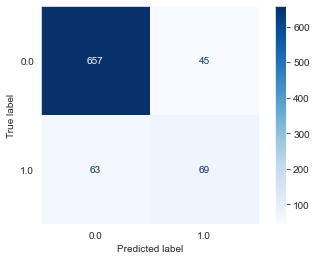

In [83]:
y_pred_dt = dt.predict(x_test)
cf = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = model_log.classes_)
disp.plot(cmap = plt.cm.Blues)
plt.grid(False)

In [84]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

AUC: 0.7293123543123543


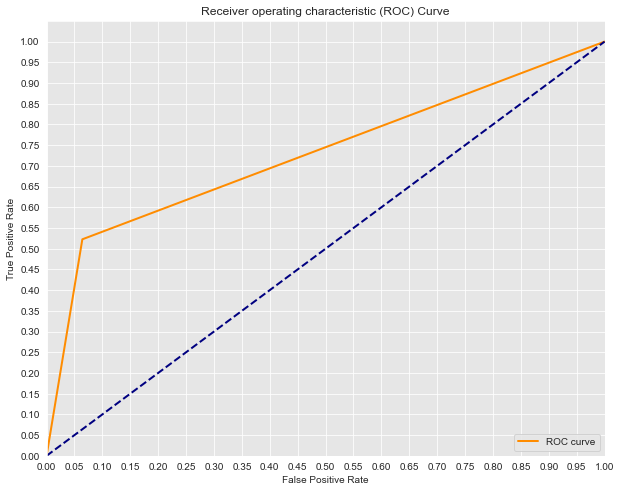

In [85]:
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

This model actually performed worse. We will be sticking with the base decision tree classifier for this model selection.

<a id = 'con' ></a>

---
# Conclusion

In conclusion, a `DecisionTreeClassifier` seems to work well to predict whether a customer would churn or not.

<a id = 'index' ></a>

---
# Index

- [Title](#title)
- [Overview](#over)
- [Business Understanding](#business) 
- [Data Understanding](#data) 
- [Methodoligy](#method)
- [Data Preparation](#prep)
- [Exploratory Data Analysis](#explore)
    - [numerical data](#number)
- [Model Preparation](#mprep)
- [Model Building and Analysis](#mba)
    - [feature selection](#feature)
    - [model #2](#m2)
    - [model #2 v2](#mv2)
- [Conclusion](#con)